# Kmeans Clustering

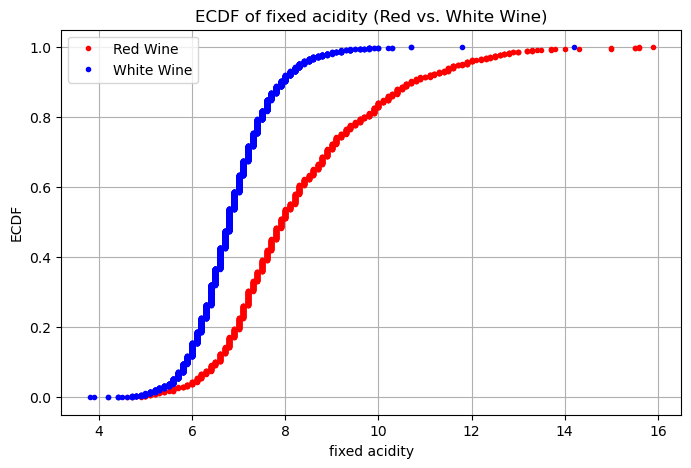

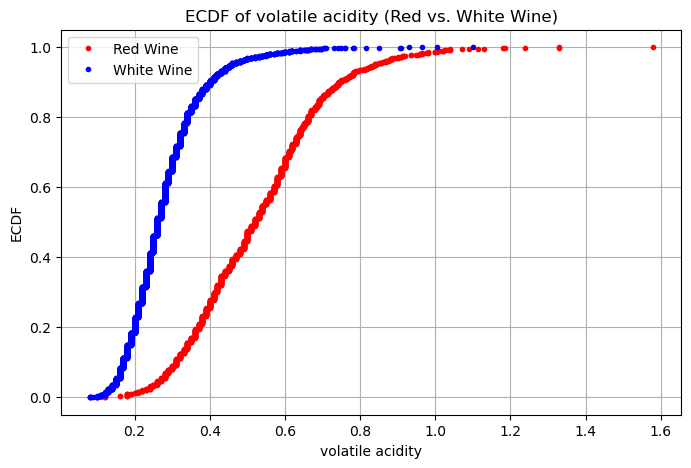

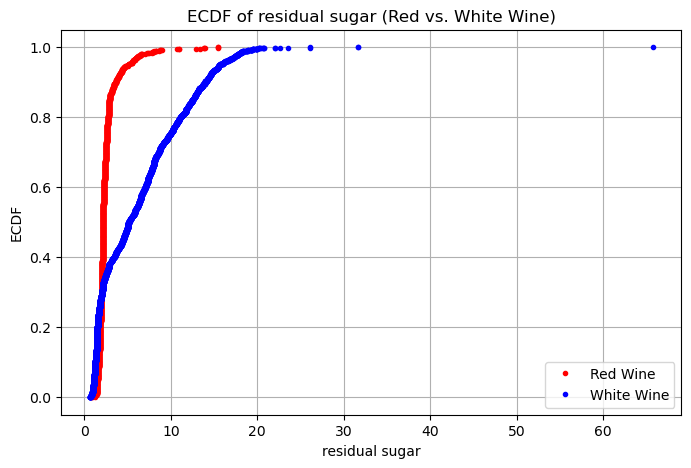

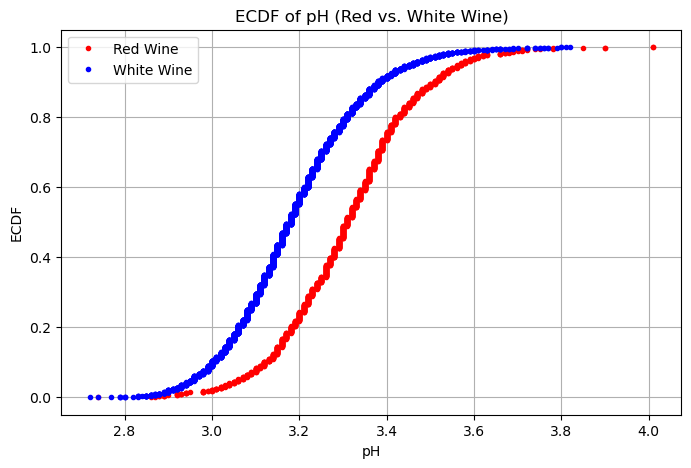

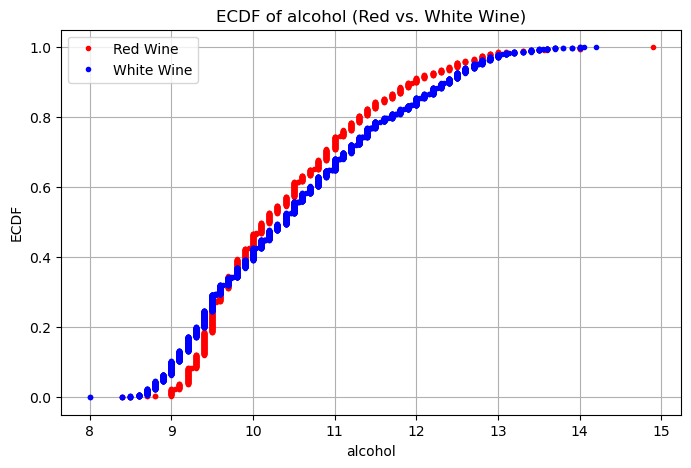

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde

# Function to plot ECDF for a given feature
def plot_ecdf(feature_name, red_data, white_data):
    plt.figure(figsize=(8, 5))

    # Compute ECDF for Red Wine
    red_sorted = np.sort(red_data[feature_name])
    red_yvals = np.arange(1, len(red_sorted) + 1) / len(red_sorted)

    # Compute ECDF for White Wine
    white_sorted = np.sort(white_data[feature_name])
    white_yvals = np.arange(1, len(white_sorted) + 1) / len(white_sorted)

    # Plot ECDF
    plt.plot(red_sorted, red_yvals, marker=".", linestyle="none", label="Red Wine", color="red")
    plt.plot(white_sorted, white_yvals, marker=".", linestyle="none", label="White Wine", color="blue")

    # Labels and legend
    plt.xlabel(feature_name)
    plt.ylabel("ECDF")
    plt.title(f"ECDF of {feature_name} (Red vs. White Wine)")
    plt.legend()
    plt.grid(True)

    # Show plot
    plt.show()

# Plot ECDF for key features
features_to_plot = ["fixed acidity", "volatile acidity", "residual sugar", "pH", "alcohol"]
for feature in features_to_plot:
    plot_ecdf(feature, red_wine, white_wine)

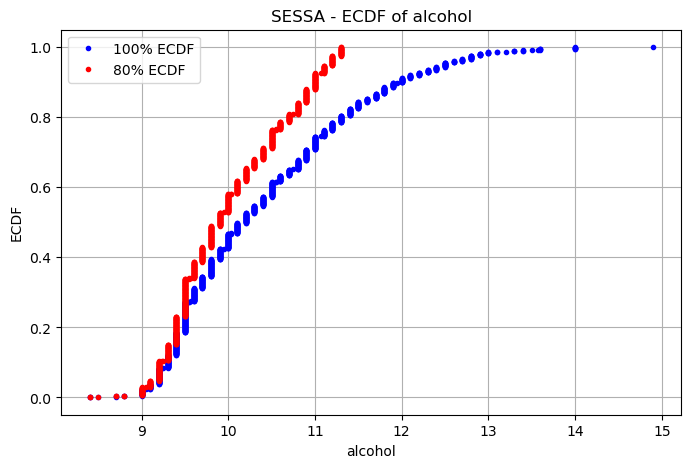

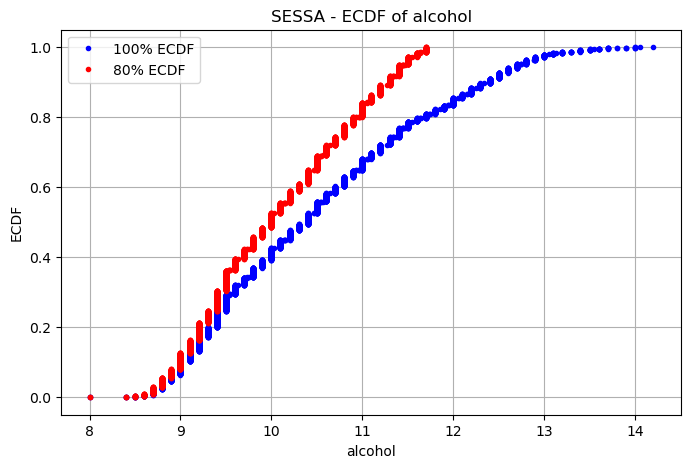

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Cluster  
0      9.4        5        1  
1      9.8        5     

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the datasets
red_wine = pd.read_csv("wine+quality/winequality-red.csv", sep=";")
white_wine = pd.read_csv("wine+quality/winequality-white.csv", sep=";")

# Function to perform SESSA on a given dataset
def sessa_analysis(data, feature_name):
    """
    Apply SESSA on a given feature of the dataset.
    1. Compute Empirical CDF.
    2. Retain 80% of the data.
    3. Apply K-Means clustering.
    4. Assign clusters based on chemical profile.
    """
    plt.figure(figsize=(8, 5))
    
    # Compute ECDF
    sorted_vals = np.sort(data[feature_name])
    yvals = np.arange(1, len(sorted_vals) + 1) / len(sorted_vals)
    
    # Plot full ECDF
    plt.plot(sorted_vals, yvals, marker=".", linestyle="none", label="100% ECDF", color="blue")

    # Retain lower 80% of data (remove extreme outliers)
    cutoff_value = np.percentile(sorted_vals, 80)
    filtered_data = data[data[feature_name] <= cutoff_value].copy()

    # Plot 80% ECDF
    sorted_vals_80 = np.sort(filtered_data[feature_name])
    yvals_80 = np.arange(1, len(sorted_vals_80) + 1) / len(sorted_vals_80)
    plt.plot(sorted_vals_80, yvals_80, marker=".", linestyle="none", label="80% ECDF", color="red")

    # Labels
    plt.xlabel(feature_name)
    plt.ylabel("ECDF")
    plt.title(f"SESSA - ECDF of {feature_name}")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Apply K-Means clustering on the filtered data
    kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
    filtered_data["Cluster"] = kmeans.fit_predict(filtered_data[[feature_name]])

    # Merge back into original dataset
    data = data.merge(filtered_data[["Cluster"]], how="left", left_index=True, right_index=True)
    data["Cluster"].fillna(-1, inplace=True)  # Assign unclustered points to -1
    data["Cluster"] = data["Cluster"].astype(int)

    return data

# Apply SESSA on red and white wine alcohol levels
red_wine_sessa = sessa_analysis(red_wine, "alcohol")
white_wine_sessa = sessa_analysis(white_wine, "alcohol")

# Display first few rows of the clustered dataset
print(red_wine_sessa.head())
print(white_wine_sessa.head())

# Other clustering methods

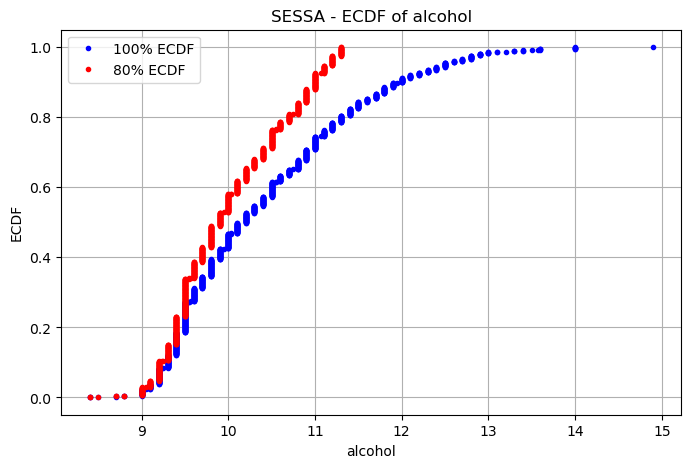

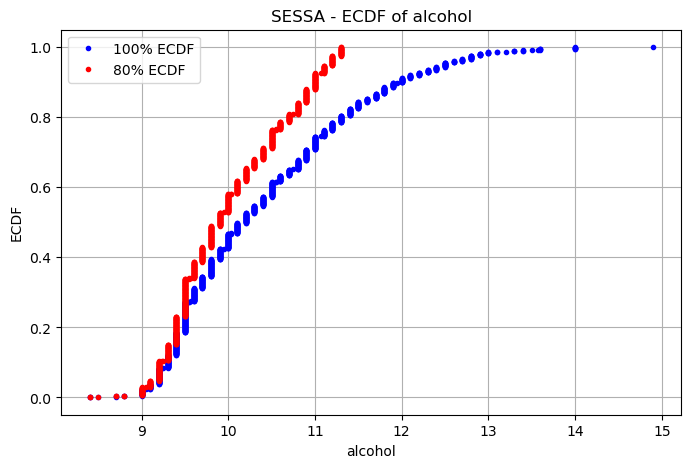

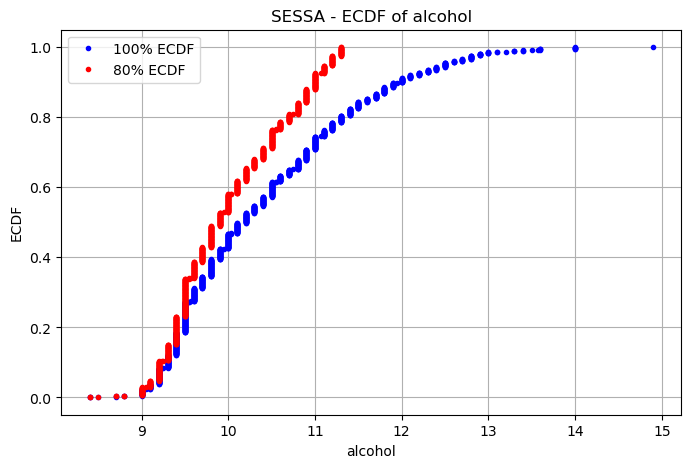

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Cluster  
0      9.4        5        1  
1      9.8        5     

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

# Load the datasets
red_wine = pd.read_csv("wine+quality/winequality-red.csv", sep=";")
white_wine = pd.read_csv("wine+quality/winequality-white.csv", sep=";")

# Function to perform SESSA with different clustering methods
def sessa_analysis(data, feature_name, method="kmeans", n_clusters=2):
    """
    Apply SESSA on a given feature of the dataset.
    Allows choosing different clustering methods:
    - 'kmeans'
    - 'hierarchical' (Agglomerative Clustering)
    - 'gmm' (Gaussian Mixture Model)
    - 'dbscan' (Density-Based Clustering)
    """
    plt.figure(figsize=(8, 5))
    
    # Compute ECDF
    sorted_vals = np.sort(data[feature_name])
    yvals = np.arange(1, len(sorted_vals) + 1) / len(sorted_vals)

    # Plot full ECDF
    plt.plot(sorted_vals, yvals, marker=".", linestyle="none", label="100% ECDF", color="blue")

    # Retain lower 80% of data (remove extreme outliers)
    cutoff_value = np.percentile(sorted_vals, 80)
    filtered_data = data[data[feature_name] <= cutoff_value].copy()

    # Plot 80% ECDF
    sorted_vals_80 = np.sort(filtered_data[feature_name])
    yvals_80 = np.arange(1, len(sorted_vals_80) + 1) / len(sorted_vals_80)
    plt.plot(sorted_vals_80, yvals_80, marker=".", linestyle="none", label="80% ECDF", color="red")

    # Labels
    plt.xlabel(feature_name)
    plt.ylabel("ECDF")
    plt.title(f"SESSA - ECDF of {feature_name}")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Normalize data (important for DBSCAN & GMM)
    scaler = StandardScaler()
    scaled_feature = scaler.fit_transform(filtered_data[[feature_name]])

    # Apply selected clustering method
    if method == "kmeans":
        model = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
        filtered_data["Cluster"] = model.fit_predict(scaled_feature)
    
    elif method == "hierarchical":
        model = AgglomerativeClustering(n_clusters=n_clusters)
        filtered_data["Cluster"] = model.fit_predict(scaled_feature)
    
    elif method == "gmm":
        model = GaussianMixture(n_components=n_clusters, random_state=42)
        filtered_data["Cluster"] = model.fit_predict(scaled_feature)
    
    elif method == "dbscan":
        # Find the best epsilon using Nearest Neighbors (optional tuning step)
        neighbors = NearestNeighbors(n_neighbors=5).fit(scaled_feature)
        distances, _ = neighbors.kneighbors(scaled_feature)
        eps_value = np.percentile(distances[:, 4], 90)  # Set epsilon to the 90th percentile
        model = DBSCAN(eps=eps_value, min_samples=5)
        filtered_data["Cluster"] = model.fit_predict(scaled_feature)

    else:
        raise ValueError("Invalid clustering method. Choose from 'kmeans', 'hierarchical', 'gmm', 'dbscan'.")

    # Merge back into original dataset
    data = data.merge(filtered_data[["Cluster"]], how="left", left_index=True, right_index=True)
    data["Cluster"].fillna(-1, inplace=True)  # Assign unclustered points to -1
    data["Cluster"] = data["Cluster"].astype(int)

    return data

# Example Usage:
red_wine_kmeans = sessa_analysis(red_wine, "alcohol", method="kmeans", n_clusters=2)
red_wine_hierarchical = sessa_analysis(red_wine, "alcohol", method="hierarchical", n_clusters=2)
red_wine_gmm = sessa_analysis(red_wine, "alcohol", method="gmm", n_clusters=2)


# Display first few rows
print(red_wine_kmeans.head())
# print(red_wine_gmm.head())

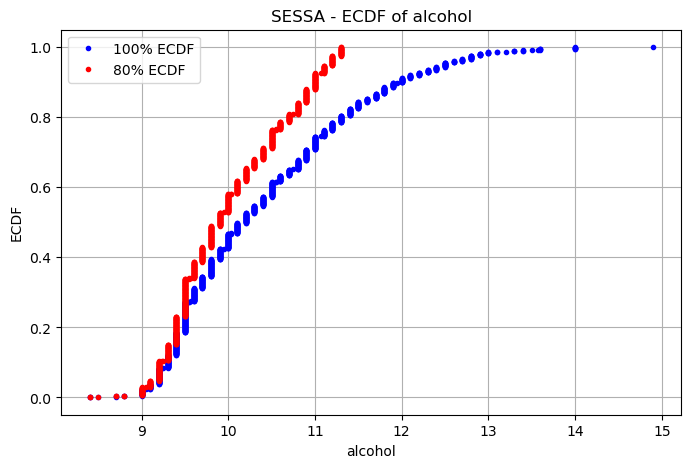

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


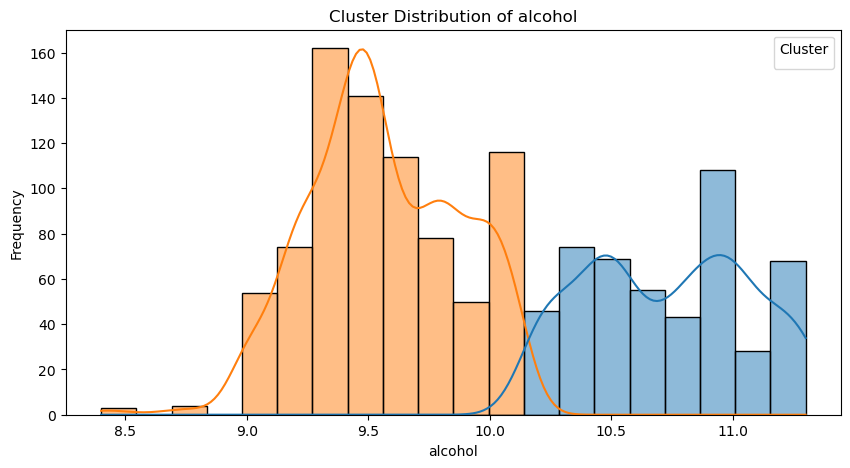

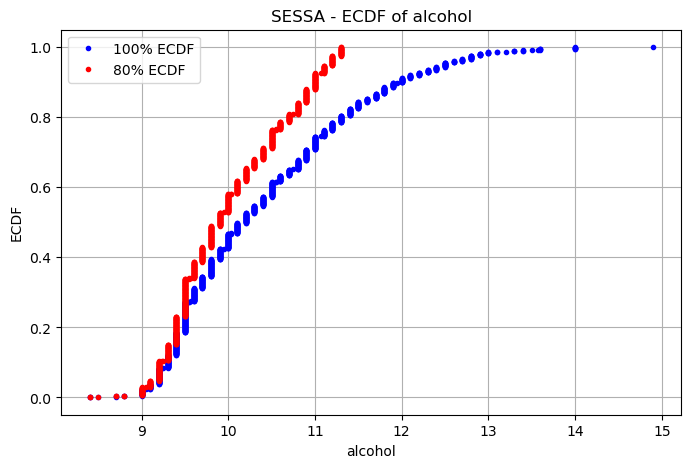

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


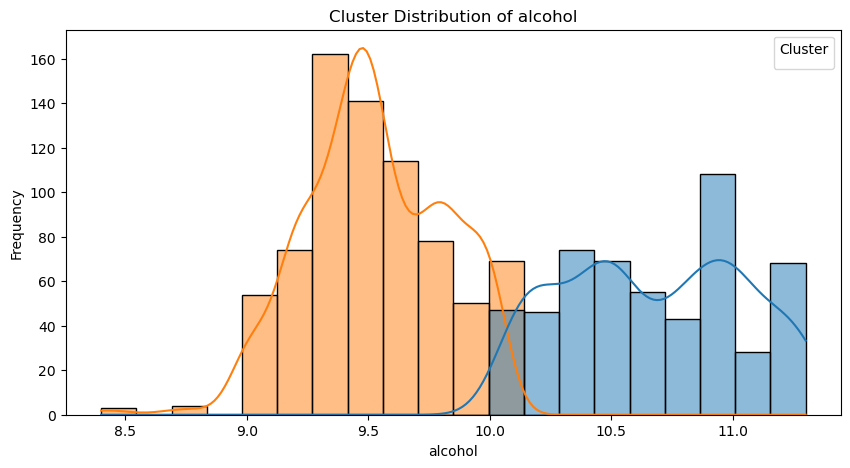

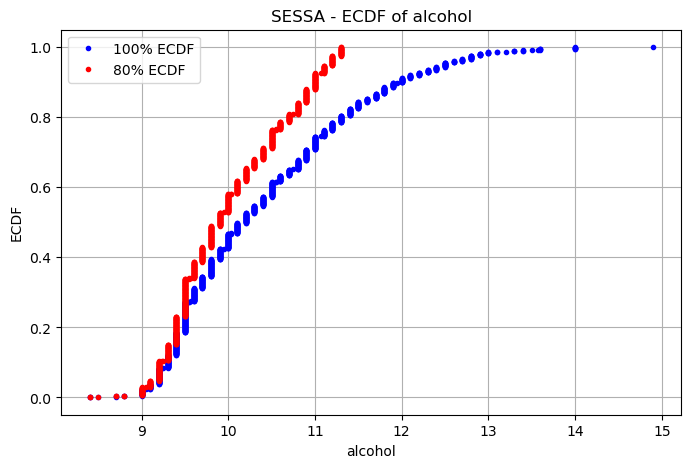

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


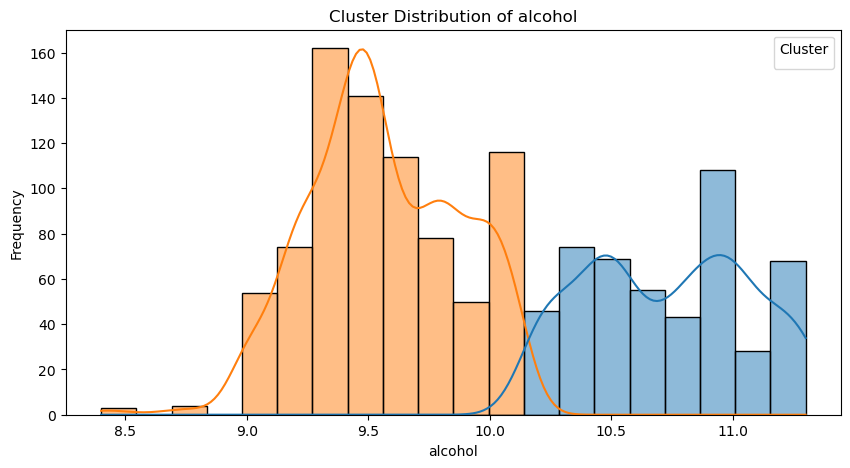

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Cluster  
0      9.4        5        1  
1      9.8        5     

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

# Load the datasets
red_wine = pd.read_csv("wine+quality/winequality-red.csv", sep=";")
white_wine = pd.read_csv("wine+quality/winequality-white.csv", sep=";")

# Function to perform SESSA with different clustering methods
def sessa_analysis(data, feature_name, method="kmeans", n_clusters=2):
    """
    Apply SESSA on a given feature of the dataset with clustering and visualization.
    - 'kmeans'
    - 'hierarchical' (Agglomerative Clustering)
    - 'gmm' (Gaussian Mixture Model)
    - 'dbscan' (Density-Based Clustering)
    """
    plt.figure(figsize=(8, 5))
    
    # Compute ECDF
    sorted_vals = np.sort(data[feature_name])
    yvals = np.arange(1, len(sorted_vals) + 1) / len(sorted_vals)

    # Plot full ECDF
    plt.plot(sorted_vals, yvals, marker=".", linestyle="none", label="100% ECDF", color="blue")

    # Retain lower 80% of data (remove extreme outliers)
    cutoff_value = np.percentile(sorted_vals, 80)
    filtered_data = data[data[feature_name] <= cutoff_value].copy()

    # Plot 80% ECDF
    sorted_vals_80 = np.sort(filtered_data[feature_name])
    yvals_80 = np.arange(1, len(sorted_vals_80) + 1) / len(sorted_vals_80)
    plt.plot(sorted_vals_80, yvals_80, marker=".", linestyle="none", label="80% ECDF", color="red")

    # Labels
    plt.xlabel(feature_name)
    plt.ylabel("ECDF")
    plt.title(f"SESSA - ECDF of {feature_name}")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Normalize data (important for DBSCAN & GMM)
    scaler = StandardScaler()
    scaled_feature = scaler.fit_transform(filtered_data[[feature_name]])

    # Apply selected clustering method
    if method == "kmeans":
        model = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
        filtered_data["Cluster"] = model.fit_predict(scaled_feature)
    
    elif method == "hierarchical":
        model = AgglomerativeClustering(n_clusters=n_clusters)
        filtered_data["Cluster"] = model.fit_predict(scaled_feature)
    
    elif method == "gmm":
        model = GaussianMixture(n_components=n_clusters, random_state=42)
        filtered_data["Cluster"] = model.fit_predict(scaled_feature)
    
    elif method == "dbscan":
        # Find the best epsilon using Nearest Neighbors (optional tuning step)
        neighbors = NearestNeighbors(n_neighbors=5).fit(scaled_feature)
        distances, _ = neighbors.kneighbors(scaled_feature)
        eps_value = np.percentile(distances[:, 4], 90)  # Set epsilon to the 90th percentile
        model = DBSCAN(eps=eps_value, min_samples=5)
        filtered_data["Cluster"] = model.fit_predict(scaled_feature)

    else:
        raise ValueError("Invalid clustering method. Choose from 'kmeans', 'hierarchical', 'gmm', 'dbscan'.")

    # Merge back into original dataset
    data = data.merge(filtered_data[["Cluster"]], how="left", left_index=True, right_index=True)
    data["Cluster"].fillna(-1, inplace=True)  # Assign unclustered points to -1
    data["Cluster"] = data["Cluster"].astype(int)

    # Visualization
    plt.figure(figsize=(10, 5))
    sns.histplot(data=filtered_data, x=feature_name, hue="Cluster", kde=True, palette="tab10", bins=20)
    plt.title(f"Cluster Distribution of {feature_name}")
    plt.xlabel(feature_name)
    plt.ylabel("Frequency")
    plt.legend(title="Cluster")
    plt.show()

    return data

# Example Usage:
red_wine_kmeans = sessa_analysis(red_wine, "alcohol", method="kmeans", n_clusters=2)
red_wine_hierarchical = sessa_analysis(red_wine, "alcohol", method="hierarchical", n_clusters=2)
red_wine_gmm = sessa_analysis(red_wine, "alcohol", method="gmm", n_clusters=2)
# red_wine_dbscan = sessa_analysis(red_wine, "alcohol", method="dbscan")  # DBSCAN auto-detects clusters

# Display first few rows
print(red_wine_kmeans.head())

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from scipy.stats import gaussian_kde

# Load the dataset
red_wine = pd.read_csv("wine+quality/winequality-red.csv", sep=";")
white_wine = pd.read_csv("wine+quality/winequality-white.csv", sep=";")

# Function to perform SESSA Empirical Estimation and Clustering
def sessa_empirical_estimation_and_clustering(data, feature_x, feature_y, wine_type):
    """
    Apply SESSA Empirical Estimation on given features of the dataset.
    1. Compute Empirical CDF.
    2. Retain 80% of the data.
    3. Apply K-Means and DBSCAN clustering.
    """
    plt.figure(figsize=(8, 5))
    
    # Compute ECDF
    sorted_vals = np.sort(data[feature_x])
    yvals = np.arange(1, len(sorted_vals) + 1) / len(sorted_vals)
    
    # Retain lower 80% of data (remove extreme outliers)
    cutoff_value = np.percentile(sorted_vals, 80)
    filtered_data = data[data[feature_x] <= cutoff_value].copy()
    
    # Apply K-Means clustering
    feature_values = filtered_data[[feature_x, feature_y]].dropna()
    scaler = StandardScaler()
    scaled_values = scaler.fit_transform(feature_values)
    
    kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
    filtered_data["KMeans_Cluster"] = kmeans.fit_predict(scaled_values)
    
    # Plot clustering results (K-Means)
    plt.figure(figsize=(8, 5))
    scatter = plt.scatter(filtered_data[feature_x], filtered_data[feature_y], c=filtered_data["KMeans_Cluster"], cmap='Set1', edgecolors='k')
    plt.xlabel(feature_x)
    plt.ylabel(feature_y)
    plt.title(f"K-Means Clustering of {feature_x} vs {feature_y} ({wine_type} wine)")
    plt.grid(True)
    
    # Add cluster labels
    unique_clusters = filtered_data["KMeans_Cluster"].unique()
    for cluster in unique_clusters:
        plt.scatter([], [], c=scatter.cmap(scatter.norm(cluster)), label=f"{cluster}", edgecolors='k')
    
    plt.legend()
    plt.show()
    
    # Apply DBSCAN clustering
    dbscan = DBSCAN(eps=0.25, min_samples=5)
    filtered_data["DBSCAN_Cluster"] = dbscan.fit_predict(scaled_values)
    
    # Plot clustering results (DBSCAN)
    plt.figure(figsize=(8, 5))
    scatter = plt.scatter(filtered_data[feature_x], filtered_data[feature_y], c=filtered_data["DBSCAN_Cluster"], cmap='Set3', edgecolors='k')
    plt.xlabel(feature_x)
    plt.ylabel(feature_y)
    plt.title(f"DBSCAN Clustering of {feature_x} vs {feature_y} ({wine_type} wine)")
    plt.grid(True)
    
    # Add cluster labels
    unique_clusters = filtered_data["DBSCAN_Cluster"].unique()
    for cluster in unique_clusters:
        plt.scatter([], [], c=scatter.cmap(scatter.norm(cluster)), label=f"{cluster}", edgecolors='k')
    
    plt.legend()
    plt.show()
    
    return filtered_data

# Apply SESSA Empirical Estimation and Clustering on fixed acidity vs volatile acidity
filtered_red_wine = sessa_empirical_estimation_and_clustering(red_wine, 'fixed acidity', 'volatile acidity', "Red")

# Display first few rows of the clustered dataset
print(filtered_red_wine.head())

FileNotFoundError: [Errno 2] No such file or directory: 'winequality-red.csv'